# Описание проекта

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

# Описание данных

* id — идентификатор объекта;
* object_name — название объекта общественного питания;
* chain — сетевой ресторан;
* object_type — тип объекта общественного питания;
* address — адрес;
* number — количество посадочных мест.

# Шаг №1. Загрузите данные и подготовьте их к анализу

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import math
from scipy import stats

from datetime import timedelta
import datetime as dt

import re
import requests

import seaborn as sns

from statsmodels.stats.proportion import proportions_ztest
import warnings

warnings.filterwarnings('ignore')


In [2]:
try:
    df = pd.read_csv('/datasets/rest_data.csv')
except:
    df = pd.read_csv('rest_data.csv')

In [3]:
df.sample(1)

,id,object_name,chain,object_type,address,number
10953,175218,КАФЕ,нет,кафе,"город Москва, Малахитовая улица, дом 14, строе...",12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [5]:
df['object_name'] = df['object_name'].str.lower()
df['object_type'] = df['object_type'].str.lower()
df['address'] = df['address'].str.lower()

In [6]:
df[df.duplicated()]

,id,object_name,chain,object_type,address,number


На первый взгляд дубликатов нет. Но если посмотреть на дубликаты столбцов без id, то ситуация изменится

In [7]:
df[df.duplicated(['object_name', 'chain', 'object_type', 'address', 'number'])]

,id,object_name,chain,object_type,address,number
2381,28611,комбинат питания мгту им.н.э.баумана,нет,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",100
3397,71896,буфет «коникс-школьник»,нет,буфет,"город москва, улица удальцова, дом 21",100
3481,20914,буфет мади,нет,буфет,"город москва, ленинградский проспект, дом 64",40
4431,23759,столовая гбоу города москвы № 384,нет,буфет,"город москва, беловежская улица, дом 67",100
4537,23391,столовая «комбинат питания космос»,нет,столовая,"город москва, новозаводская улица, дом 12/11",15
...,...,...,...,...,...,...
14578,222932,старый баку,нет,кафе,"город москва, кировоградская улица, владение 15а",120
14596,204947,буфет при кинотеатре,нет,буфет,"город москва, ореховый бульвар, дом 22а",0
14844,219518,sushi-make,нет,предприятие быстрого обслуживания,"город москва, ярцевская улица, дом 19",0
15173,218542,кофе с собой,да,предприятие быстрого обслуживания,"город москва, алтуфьевское шоссе, дом 70, корп...",0


In [8]:
#удаляем дубликаты
df = df.drop_duplicates(subset=['object_name', 'chain', 'object_type', 'address', 'number'])

In [9]:
#проверим наличие дубликатов, где совпадают название и адрес заведения
df.duplicated(subset=['object_name', 'address']).sum()

140

У нас осталось 140 заведений которые совпадают по адресу и по типу заведения

In [10]:
#посмотрим на эти значения
df[df.duplicated(subset=['object_name', 'address'])].head(30)

,id,object_name,chain,object_type,address,number
114,28613,комбинат питания мгту им.н.э.баумана,нет,закусочная,"город москва, бригадирский переулок, дом 3-5",216
115,28614,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, бригадирский переулок, дом 3-5",12
579,149227,общественное питание,нет,столовая,"город москва, павелецкая площадь, дом 1",70
580,149205,общественное питание,нет,кафе,"город москва, павелецкая площадь, дом 1",35
581,149131,общественное питание,нет,кафе,"город москва, павелецкая площадь, дом 1",39
1409,151267,альфорно,нет,кафе,"город москва, город зеленоград, корпус 438",45
1648,151871,ресторан «практика by darvin»,нет,кафе,"город москва, большая грузинская улица, дом 37...",50
2375,28604,комбинат питания мгту им.н.э.баумана,нет,столовая,"город москва, 2-я бауманская улица, дом 5, стр...",150
2376,28605,комбинат питания мгту им.н.э.баумана,нет,кафетерий,"город москва, 2-я бауманская улица, дом 5, стр...",35
2377,28606,комбинат питания мгту им.н.э.баумана,нет,буфет,"город москва, 2-я бауманская улица, дом 5, стр...",16


У нас есть заведения у которых совпадает название и адрес, но типы заведений разные. У таких данных сильно различаются посадочные места, что может говорить о том, что  один тип заведения включает другой. В таком случае мы можем удалить дубликаты таких данных и не углубляться, потому что их не так много и они не повлияют на результат

In [11]:
df = df.drop_duplicates(subset=['object_name', 'address'])

In [12]:
#посмотрим уникальные значения типов объектов
df['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [13]:
round((df.isna().mean()*100),2)

id             0.0
object_name    0.0
chain          0.0
object_type    0.0
address        0.0
number         0.0
dtype: float64

Нулевых значений нет

In [14]:
df['number'].min()

0

In [15]:
df['number'].max()

1700

In [16]:
df['number'].value_counts(ascending = False)

0      1576
40      826
20      716
30      677
10      625
       ... 
491       1
675       1
455       1
167       1
495       1
Name: number, Length: 315, dtype: int64

<AxesSubplot:>

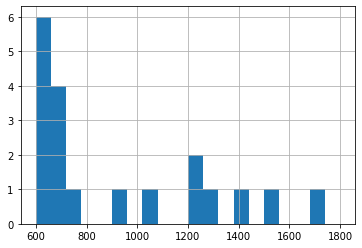

In [17]:
df['number'].hist(bins = 20, range=(600, 1800))

У нас есть заведения где 0 посадочных мест, что нормально для некоторых типов заведений. Есть заведения с посадочными местами больше 600, которые вызывают некоторые подозрения. Удалим их

In [18]:
df = df.query('number < 600')

In [19]:
#проверка на отрицательные значения
df['number'].any()

True

In [20]:
# делаем все значения положительными в столбце
df['number'] = df['number'].abs()

### Вывод:
* Все строки приведены к нижнему регистру
* 85 строк с дубликатами были удалены
* с типами данных всё в порядке
* удалены заведения с посадочными местами больше 600
* найдены заведения с отрицательным количеством посадочных мест и взяли их по модулю
* заведения с 0 количеством посадочных мест не исключены, так как действительно существуют

# Шаг №2. Анализ данных

### Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.

In [21]:
df_type = df.groupby('object_type').sum().reset_index()
df_type = df_type.sort_values(by = 'number', ascending = False)

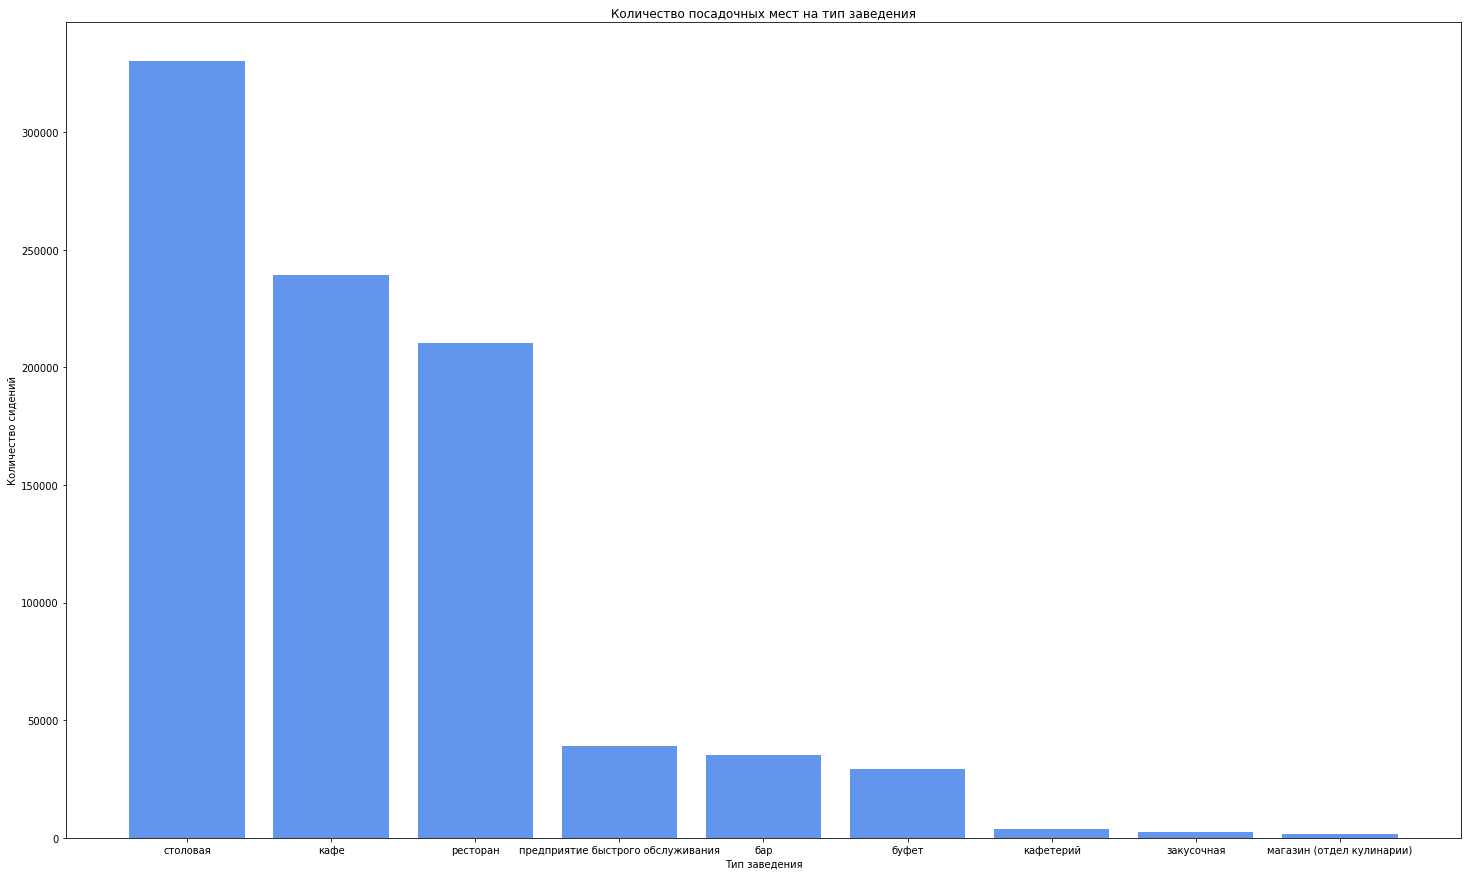

In [22]:
plt.figure(figsize=(25,15))
plt.bar(df_type['object_type'], df_type['number'], color=['cornflowerblue'])
plt.title('Количество посадочных мест на тип заведения')
plt.xlabel('Тип заведения')
plt.ylabel('Количество сидений');
#plt.legend() 

In [23]:
temp2 = df.groupby('object_type')['object_type'].count()
#temp2.to_frame()

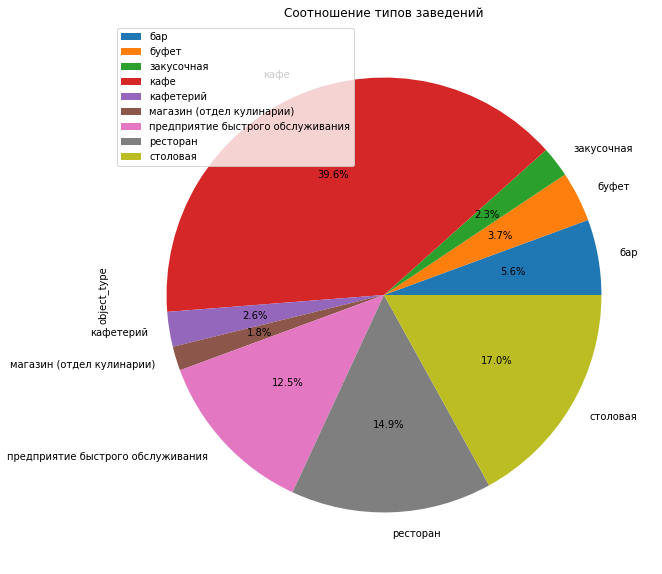

In [24]:
pie_type = temp2.plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(10,10), y= 'object_type')
pie_type.set_title('Cоотношение типов заведений');

*Столовая, кафе и ресторан явно преобладают по количеству мест. Также они выигрывают по количеству заведений*

### Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.

In [25]:
chain_share = df.groupby('chain')['object_name'].count()
chain_share

chain
да      2937
нет    12185
Name: object_name, dtype: int64

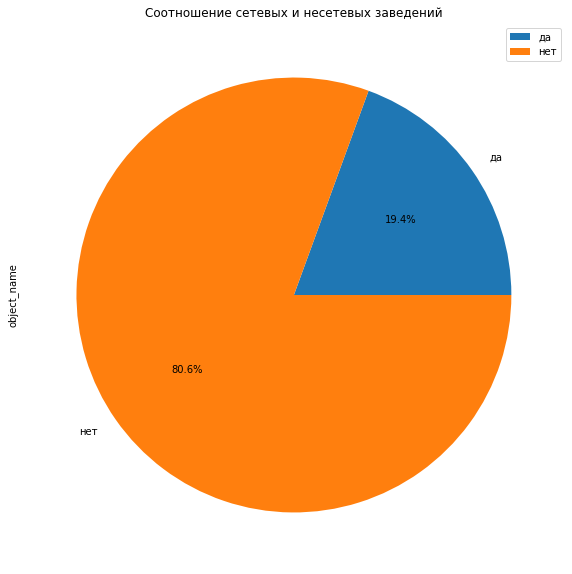

In [26]:
pie_chain = chain_share.plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(10,10), y= 'object_type|')
pie_chain.set_title('Cоотношение сетевых и несетевых заведений');

*Несетевых мест в 4 раза больше чем сетевых*

### Для какого вида объекта общественного питания характерно сетевое распространение?

In [27]:
bar_chain = df[df['chain'] == 'да']
bar_chain

,id,object_name,chain,object_type,address,number
3,21894,пиццетория,да,кафе,"город москва, абрамцевская улица, дом 1",40
6,148815,брусника,да,кафе,"город москва, переулок сивцев вражек, дом 6/2",10
13,22579,алло пицца,да,кафе,"город москва, улица авиаторов, дом 14",32
16,144107,суши wok,да,предприятие быстрого обслуживания,"город москва, азовская улица, дом 3",7
18,58565,тануки,да,ресторан,"город москва, большая академическая улица, дом 65",160
...,...,...,...,...,...,...
15359,222077,кофейня «шоколадница»,да,кафе,"город москва, кантемировская улица, дом 47",72
15360,219759,шоколадница,да,кафе,"город москва, улица вавилова, дом 3",36
15361,208537,шоколадница,да,кафе,"город москва, 3-й крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город москва, улица земляной вал, дом 33",10


In [28]:
chain = bar_chain.groupby('object_type')['object_type'].count()
chain = chain.sort_values(ascending = False)
#a = chain.to_frame()#.reset_index()

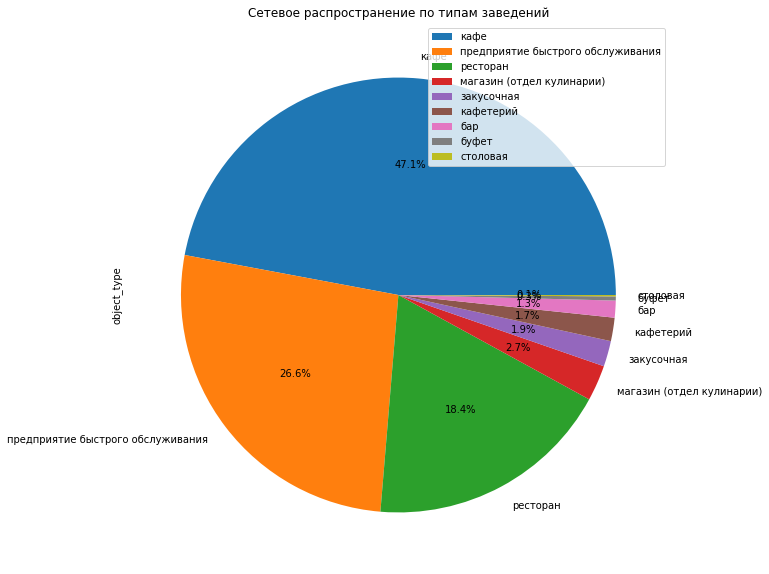

In [29]:
# Сетевое распространение по типам заведений НЕ УЧИТЫВАЯ разное количество заведений по типам
pie_chain = chain.plot(kind='pie', autopct='%1.1f%%', legend=True, figsize=(10,10), y= 'object_type|')
pie_chain.set_title('Сетевое распространение по типам заведений');

In [30]:
# Сетевое распространение по типам заведений УЧИТЫВАЯ разное количество заведений по типам
df1 = df.pivot_table(index='object_type', columns='chain', aggfunc='count', values='id')
df1['percent'] = (df1['да'] / (df1['нет'] + df1['да']))*100
df1.sort_values(by='percent', ascending=False).round(1)

chain,да,нет,percent
object_type,,,
предприятие быстрого обслуживания,782,1103,41.5
магазин (отдел кулинарии),78,194,28.7
ресторан,539,1720,23.9
кафе,1382,4609,23.1
закусочная,56,288,16.3
кафетерий,51,341,13.0
бар,37,811,4.4
буфет,9,556,1.6
столовая,3,2563,0.1


* Сетевое распространение по типам заведений, **НЕ УЧИТЫВАЯ** разное количество заведений по типам, больше всего приходится на: кафе, предприятия быстрого обслуживания и рестораны

* Сетевое распространение по типам заведений, **УЧИТЫВАЯ** разное количество заведений по типам, больше всего приходится на: предприятия быстрого обслуживания, магазины (отдел кулинарии), рестораны, кафе


### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

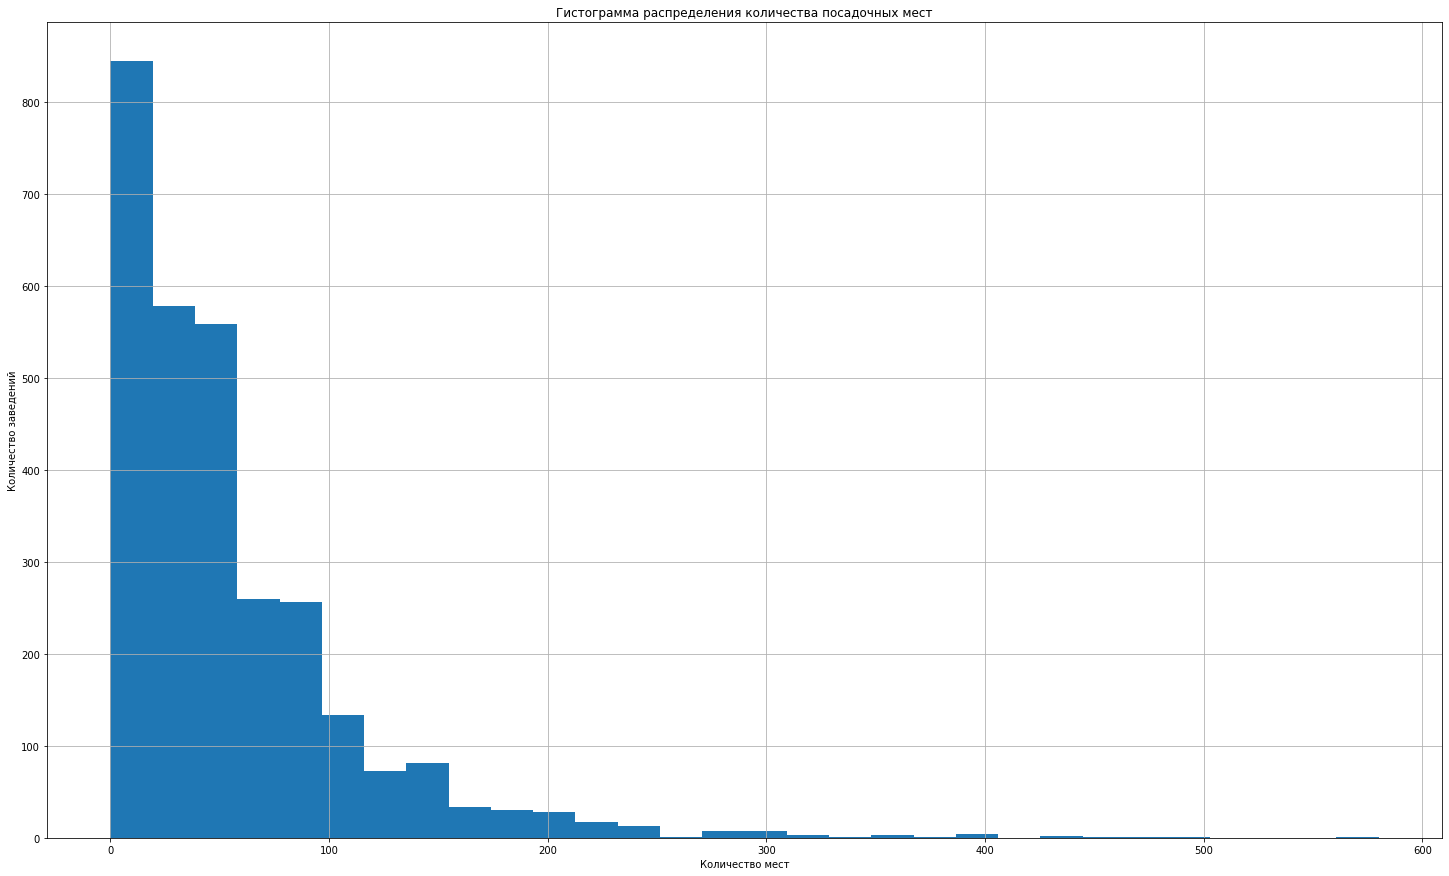

In [31]:
plt.figure(figsize=(25,15))
bar_chain['number'].hist(bins=30)
plt.title('Гистограмма распределения количества посадочных мест')
plt.xlabel('Количество мест')
plt.ylabel('Количество заведений')
plt.show()

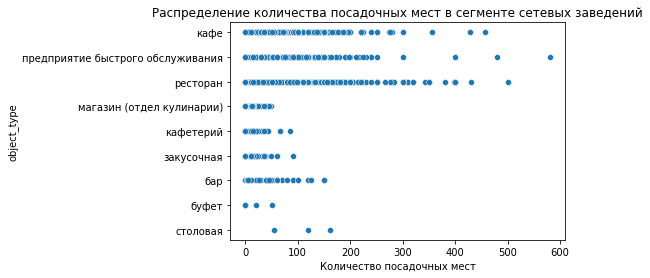

In [32]:
ax = sns.scatterplot(x='number', y='object_type', data=bar_chain, palette="hls")
ax.set_title('Распределение количества посадочных мест в сегменте сетевых заведений');
ax.set_xlabel('Количество посадочных мест');

*Для сетевых заведений характерно большое количество заведений с небольшим количеством посадочных мест*

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.

In [33]:
df['number']

0        48
1        35
2        95
3        40
4        50
         ..
15359    72
15360    36
15361    50
15362    10
15364    36
Name: number, Length: 15122, dtype: int64

In [34]:
#найдем медианные значения числа посадочных мест
seats_by_object = df.groupby('object_type').agg({'number':'median'}).sort_values(by='number', ascending=False).reset_index()
seats_by_object

,object_type,number
0,столовая,103
1,ресторан,80
2,бар,35
3,буфет,32
4,кафе,32
5,кафетерий,6
6,предприятие быстрого обслуживания,6
7,закусочная,0
8,магазин (отдел кулинарии),0


In [35]:
#найдем средние значения числа посадочных мест
seats_mean = df.groupby('object_type').agg({'number':'mean'}).sort_values(by='number', ascending=False).reset_index()
seats_mean

,object_type,number
0,столовая,128.669135
1,ресторан,93.031430
2,буфет,51.660177
3,бар,41.707547
4,кафе,39.915707
5,предприятие быстрого обслуживания,20.743767
6,кафетерий,9.155612
7,закусочная,6.904070
8,магазин (отдел кулинарии),5.610294


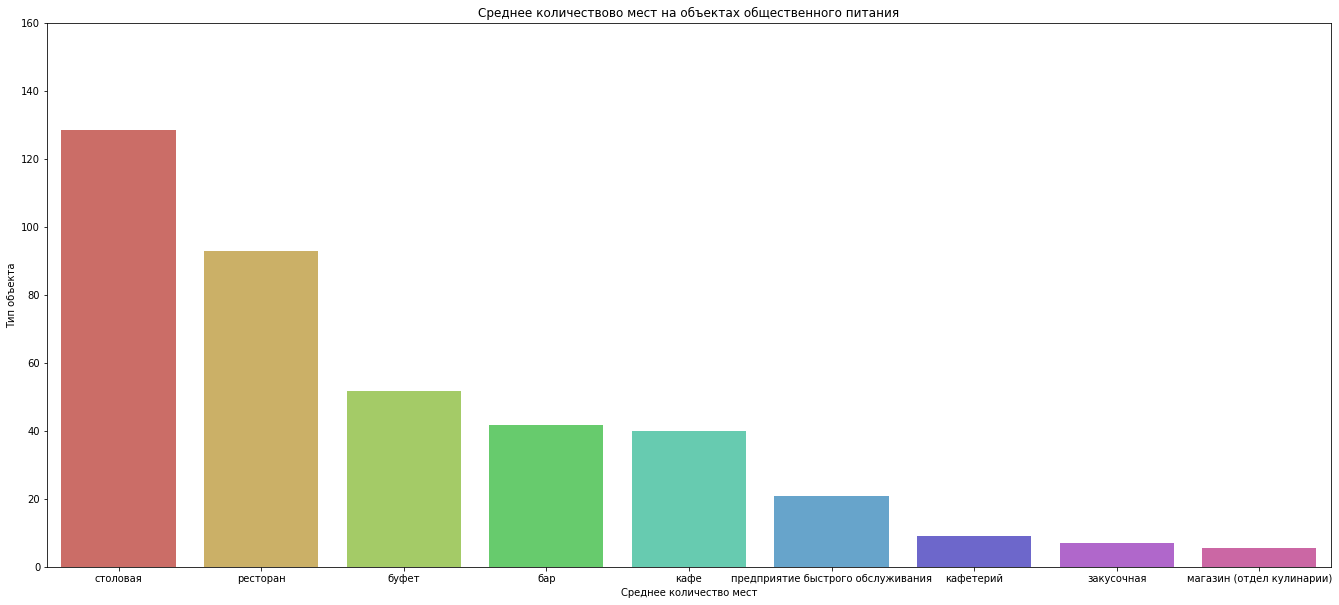

In [36]:
plt.figure(figsize=(23,10))
ax = sns.barplot(y='number', x='object_type', data=seats_mean, palette="hls")
ax.set_ylim(0,160)
ax.set_ylabel('Тип объекта')
ax.set_xlabel('Среднее количество мест')
ax.set_title('Среднее количествово мест на объектах общественного питания');

In [37]:
#ax = sns.boxplot(x='number', y='object_type', data=df, palette="hls")
#ax.set_xlim(-50,1000)
#ax.set_xlabel('Количество посадочных мест');
#ax.set_title('Распределение количества посадочных мест');

*Столовые и рестораны обладают наибольшим числом посадочным мест*

### Выделите в отдельный столбец информацию об улице из столбца *address* .

In [38]:
df_street = df
df_street['street'] = df_street['address'].apply(lambda x: x.split(', ')[1])

In [39]:
df_street_add = df
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))
df_street_add["street"] = df_street_add["address"].str.extract(str_pat, flags=re.I)
df_street_add.sample(5)

,id,object_name,chain,object_type,address,number,street
9002,163125,sushi love,нет,кафе,"город москва, улица декабристов, дом 20, корпус 1",4,улица декабристов
15078,221050,прайм стар,да,кафе,"город москва, мясницкая улица, дом 24/7, строе...",38,мясницкая улица
6215,29099,школьно-базовая столовая,нет,столовая,"город москва, бартеневская улица, дом 49, корп...",120,бартеневская улица
15030,214323,osteria mario,да,ресторан,"город москва, проспект вернадского, дом 6",50,проспект вернадского
7976,124196,мама-карло,нет,ресторан,"город москва, улица земляной вал, дом 33",61,улица земляной вал


In [40]:
# проверяем на образование пропусков
df_street['street'][df_street['street'].isnull() == 'True'].count()

0

In [41]:
df_street['street'].value_counts().head(20)

проспект мира              196
профсоюзная улица          179
ленинградский проспект     168
пресненская набережная     165
варшавское шоссе           162
ленинский проспект         147
проспект вернадского       125
кутузовский проспект       110
каширское шоссе            109
кировоградская улица       106
ходынский бульвар          101
ленинградское шоссе        100
дмитровское шоссе          100
улица новый арбат           92
улица ленинская слобода     85
алтуфьевское шоссе          81
пятницкая улица             80
проспект андропова          79
улица покровка              77
улица земляной вал          77
Name: street, dtype: int64

Можем заметить, что мы получили не только улицы - 'город зеленоград ', 'поселение сосенское'. Для дальнейшего анализа эти строки стоит удалить

In [42]:
df_street = df_street.drop(df_street[df_street['street'] == 'поселение сосенское'].index)
df_street = df_street.drop(df_street[df_street['street'] == 'город зеленоград'].index)

In [43]:
df_street.sample()

,id,object_name,chain,object_type,address,number,street
5993,29264,столовая 1420-1,нет,столовая,"город москва, ташкентская улица, дом 21, корпу...",200,ташкентская улица


*Столбец с улицами создан*

### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [44]:
#прочитаем таблицу с перечнем улиц Москвы и их соотвествием районам
url = 'https://github.com/492122/data_streets/blob/main/mosgaz-streets.csv'  
foreign_data = pd.read_html(url)[0] 
foreign_data

,Unnamed: 0,streetname,areaid,okrug,area
0,NaN,Выставочный переулок,17,ЦАО,Пресненский район
1,NaN,улица Гашека,17,ЦАО,Пресненский район
2,NaN,Большая Никитская улица,17,ЦАО,Пресненский район
3,NaN,Глубокий переулок,17,ЦАО,Пресненский район
4,NaN,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...,...
4393,NaN,Вознесенский проезд,17,ЦАО,Пресненский район
4394,NaN,Волков переулок,17,ЦАО,Пресненский район
4395,NaN,Поварская улица,17,ЦАО,Пресненский район
4396,NaN,Кудринская площадь,17,ЦАО,Пресненский район


In [45]:
top10_street = df_street['street'].value_counts().head(10).reset_index()
top10_street.columns = ['street', 'object_count']
top10_street.head(10)

,street,object_count
0,проспект мира,196
1,профсоюзная улица,179
2,ленинградский проспект,168
3,пресненская набережная,165
4,варшавское шоссе,162
5,ленинский проспект,147
6,проспект вернадского,125
7,кутузовский проспект,110
8,каширское шоссе,109
9,кировоградская улица,106


*10 улиц на которых больше всего находится объектов общественного питания*

In [46]:
#удалим ненужные столбцы
foreign_data.drop(['Unnamed: 0', 'areaid', 'okrug'], axis='columns', inplace=True)

In [47]:
#переведем текст в нижний регистр
foreign_data['streetname'] = foreign_data['streetname'].str.lower()
foreign_data['area'] = foreign_data['area'].str.lower()

In [48]:
foreign_data = foreign_data.rename(columns={'streetname':'street_name'})

In [49]:
street_name = pd.merge(top10_street, foreign_data, left_on='street', right_on='street_name', how='left')
street_name.sample(5)

,street,object_count,street_name,area
37,проспект вернадского,125,проспект вернадского,район гагаринский
2,проспект мира,196,проспект мира,район марьина роща
9,профсоюзная улица,179,профсоюзная улица,район ясенево
42,каширское шоссе,109,каширское шоссе,район нагатино-садовники
41,каширское шоссе,109,каширское шоссе,район москворечье-сабурово


In [50]:
street_name.isna().sum()

street          0
object_count    0
street_name     0
area            0
dtype: int64

При склеивании пропусков не появилось

In [51]:
street_name.drop(['street_name'], axis='columns', inplace=True)

In [52]:
distr = street_name.groupby('street')['area'].value_counts().to_frame()
distr

area
street                 area                                 
варшавское шоссе       донской район                       1
                       нагорный район                      1
                       район нагатино-садовники            1
                       район северное бутово               1
                       район чертаново северное            1
                       район чертаново центральное         1
                       район чертаново южное               1
                       район южное бутово                  1
каширское шоссе        район москворечье-сабурово          1
                       район нагатино-садовники            1
                       район орехово-борисово северное     1
                       район орехово-борисово южное        1
кировоградская улица   район чертаново северное            1
                       район чертаново центральное         1
                       район чертаново южное               1
кутузовский проспект   район дорогомилово                  1
                       район фили-давыдково                1
ленинградский проспект район аэропорт                      1
                       район беговой                       1
                       район сокол                         1
                       хорошевский район                   1
ленинский проспект     донской район                       1
                       ломоносовский район                 1
                       обручевский район                   1
                       район гагаринский                   1
                       район проспект вернадского          1
                       район теплый стан                   1
                       район тропарево-никулино            1
                       район якиманка                      1
пресненская набережная пресненский район                   1
проспект вернадского   ломоносовский район                 1
                       район гагаринский                   1
                       район проспект вернадского          1
                       район раменки                       1
                       район тропарево-никулино            1
проспект мира          алексеевский район                  1
                       мещанский район                     1
                       останкинский район                  1
                       район марьина роща                  1
                       район ростокино                     1
                       район свиблово                      1
                       ярославский район                   1
профсоюзная улица      академический район                 1
                       обручевский район                   1
                       район коньково                      1
                       район теплый стан                   1
                       район черемушки                     1
                       район ясенево                       1

*Общая сводка улиц по районам Москвы*

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [53]:
one_object = df_street['street'].value_counts().reset_index()
one_object = one_object[one_object['street'] == 1]
one_object.columns = ['street', 'object_count']
one_object

,street,object_count
1347,большой предтеченский переулок,1
1348,боровский проезд,1
1349,зюзинская улица,1
1350,большой строченовский переулок,1
1351,докучаев переулок,1
...,...,...
1894,улица школа-интернат,1
1895,будайская улица,1
1896,новопресненский переулок,1
1897,парковая улица,1


In [54]:
one_object['street'][one_object['street'].duplicated()]

Series([], Name: street, dtype: object)

*Всего 579 улиц где всего 1 объект*

In [55]:
only_one_street = pd.merge(one_object, foreign_data, left_on='street', right_on='street_name', how='left')

In [56]:
only_one_street.sample(1)

,street,object_count,street_name,area
131,большая бутовская улица,1,большая бутовская улица,район южное бутово


In [57]:
only_one_street.drop(['street_name'], axis='columns', inplace=True)

In [58]:
final_one_street = only_one_street.groupby('area').count().sort_values(by='street', ascending=False).reset_index()
final_one_street.drop(['object_count'], axis='columns', inplace=True)
final_one_street

,area,street
0,таганский район,27
1,район хамовники,26
2,басманный район,26
3,тверской район,20
4,пресненский район,19
...,...,...
95,алтуфьевский район,1
96,район марьино,1
97,район метрогородок,1
98,район москворечье-сабурово,1


In [59]:
final_one_street_12 = final_one_street.head(12)
final_one_street_12.sample()

,area,street
6,мещанский район,17


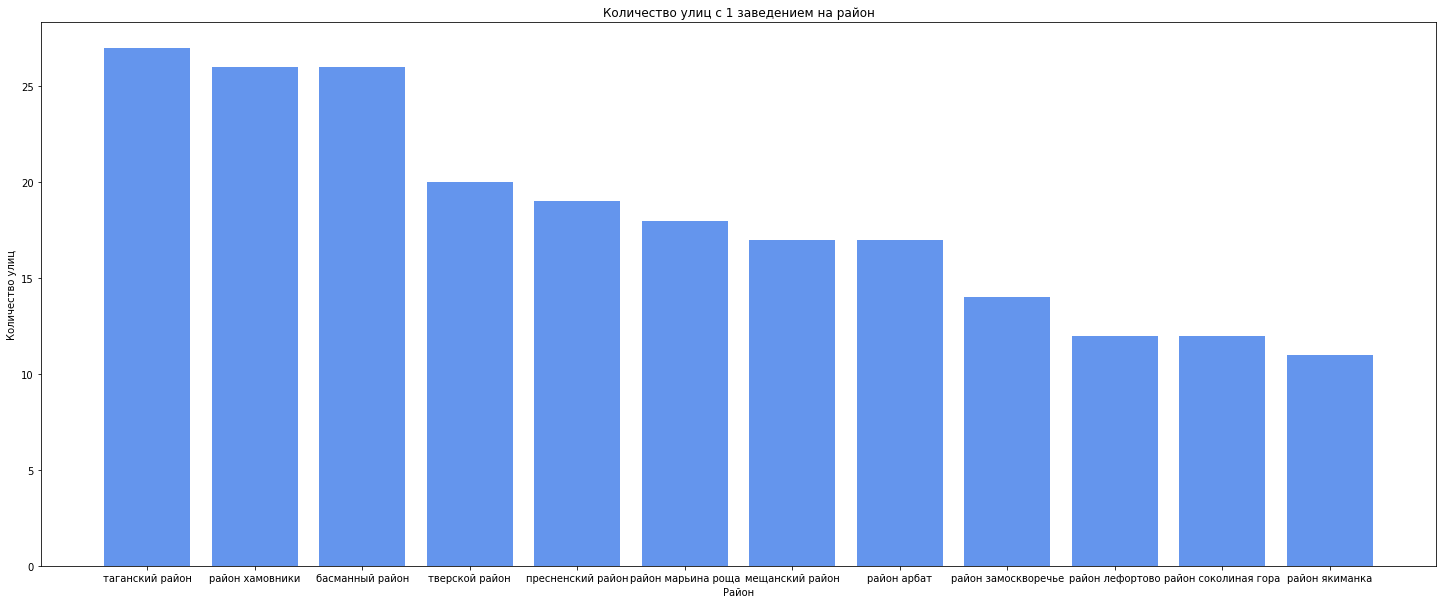

In [60]:
plt.figure(figsize=(25,10))
plt.bar(final_one_street_12['area'], final_one_street_12['street'], color=['cornflowerblue'])
plt.title('Количество улиц с 1 заведением на район')
plt.xlabel('Район')
plt.ylabel('Количество улиц');
#plt.legend() 

*Отображены районы в которых наибольшее количество улиц с одним заведением*

*579 улиц*

*99 районов*

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [61]:
street_number_top = df_street.groupby('street').count().sort_values(by='object_type', ascending=False).head(12).reset_index()
street_number_top = street_number_top[['street', 'number']]#.to_list()
street_list = street_number_top['street'].to_list()
street_number_top

,street,number
0,проспект мира,196
1,профсоюзная улица,179
2,ленинградский проспект,168
3,пресненская набережная,165
4,варшавское шоссе,162
5,ленинский проспект,147
6,проспект вернадского,125
7,кутузовский проспект,110
8,каширское шоссе,109
9,кировоградская улица,106


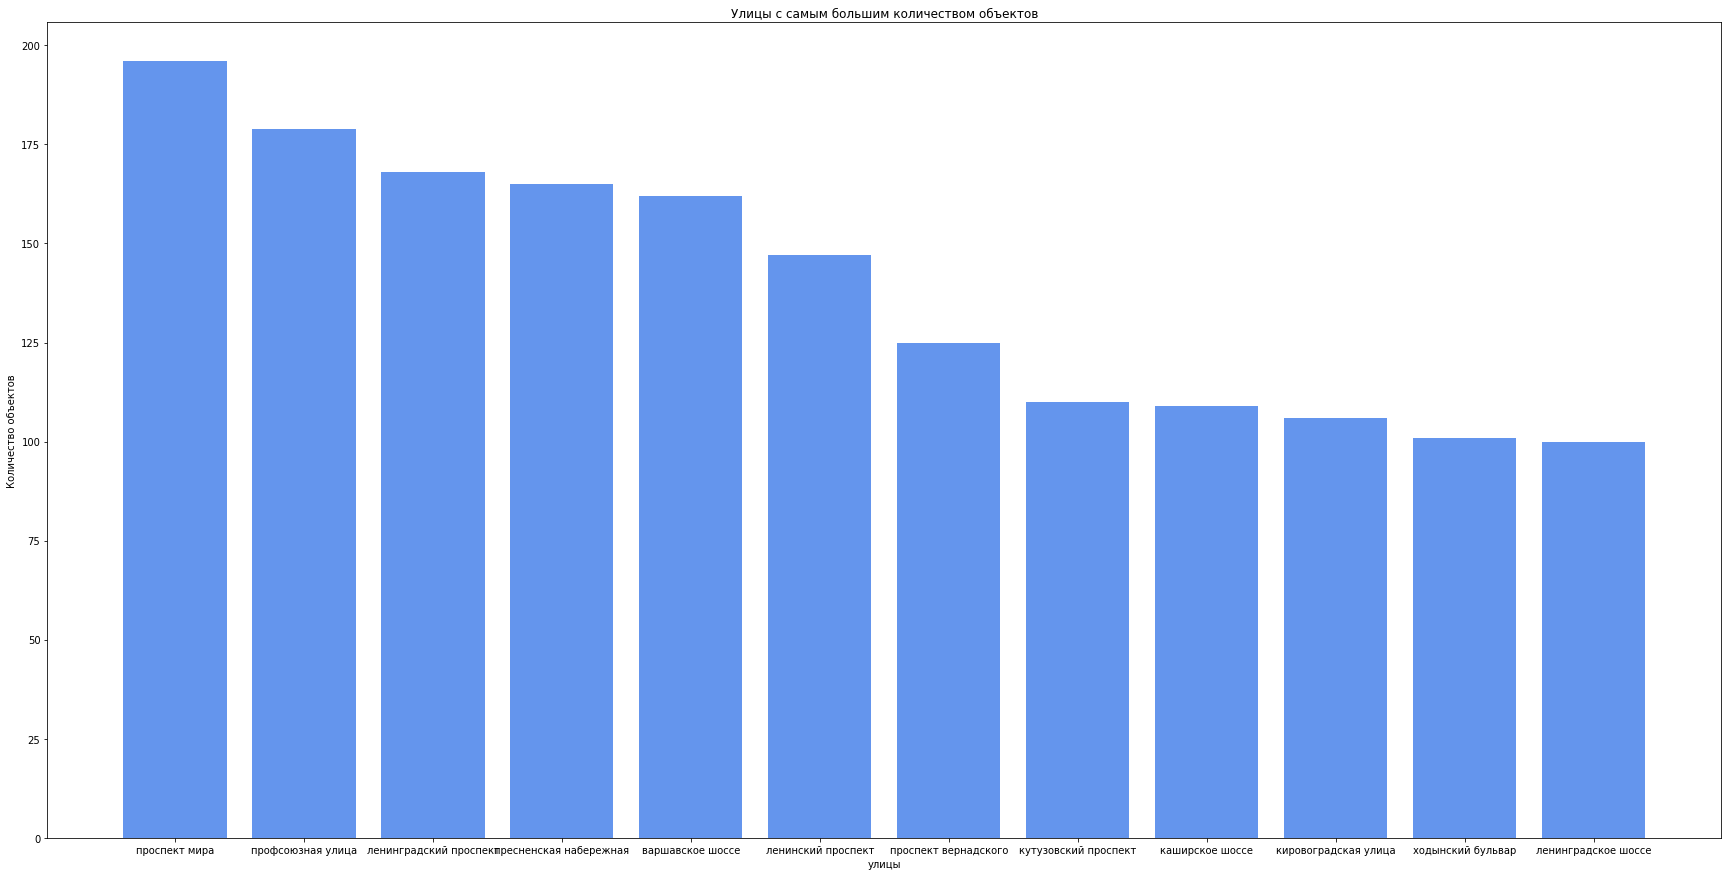

In [62]:
plt.figure(figsize=(30,15))
plt.bar(street_number_top['street'], street_number_top['number'], color=['cornflowerblue'])
plt.title('Улицы с самым большим количеством объектов')
plt.xlabel('улицы')
plt.ylabel('Количество объектов');

In [63]:
df_query = df_street.query('street == @street_list')

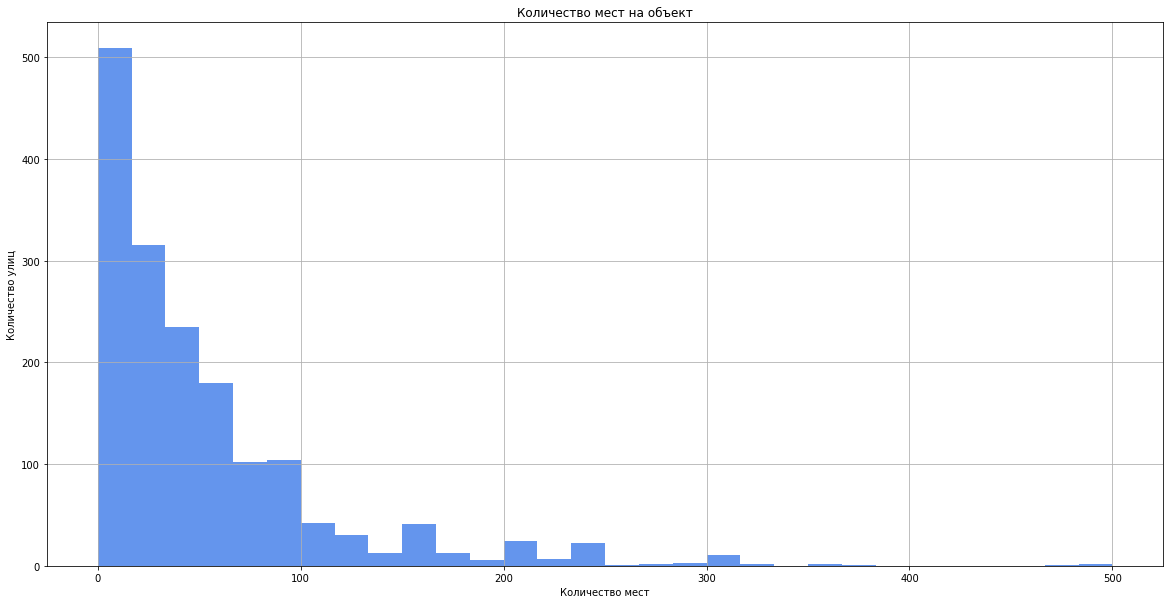

In [64]:
plt.figure(figsize=(20,10))
df_query['number'].hist(bins=30,color='cornflowerblue')
plt.title('Количество мест на объект')
plt.xlabel('Количество мест')
plt.ylabel('Количество улиц')
plt.show()

In [65]:
street_number_top['number'].describe()

count     12.000000
mean     139.000000
std       34.311408
min      100.000000
25%      108.250000
50%      136.000000
75%      165.750000
max      196.000000
Name: number, dtype: float64

*На улицах где большое количество посадочных мест находятся по большей части объекты с небольшой вместительностью. Скорее всего эти улицы находятся близко к центру города, потому что это самое удобное расположение для объектов общественного питания. Малая вместительность может говорить о том, что стоимость аренды на этих улицах высокая.*

### Презентация

Ссылка на презентацию: https://docs.google.com/presentation/d/1aM4PKAdH9l0UifgmuYGhNaaZ_VNj4B6bXhddvr1BoYQ/edit?usp=sharing

### Общий вывод

* Самый распространённый тип заведений - кафе. Потом идут столовая, ресторан, предприятие быстрого обслуживания
* 80% рынка занимают несетевые заведения
* В столовых, в кафе и в ресторанах самое большое количество посадочных мест
* Сетевое распространение больше всего у кафе и предприятий быстрого обслуживания
* Определили 12 улиц на которых самое большое количество объектов. Выяснили, что улицы находятся в центре города
* Определили список районов, в которых располагаются улицы с самым большим количеством объектов общественного питания

### Рекомендации

Планируется открытие небольшого кафе с конкурентным преимуществом в виде роботизации. Среди кафе в Москве самая высокая конкуренция в связи с этим часто закрываются старые кафе и открываются на их месте новые, поэтому рекомендуется выкупить бизнес конкурента и уже на готовом месте перестраивать кафе. Это сильно снизит затраты чем строить кафе с 0. Рекомендуется выбирать место ближе к центру, потому что там располагаются по большей части небольшие кафе. Кафе будет пользоваться спросом в деловых районах столицы, потому что роботы будут гарантировать некую анонимность приходящих гостей